In [1]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/My Drive/DL Project/CNN Project-2"

'Project 2 | Introduction to Neural Networks and Deep Learning.ipynb'
 SVHN_CNN_Transfer_Updated.ipynb
 SVHN_single_grey1.h5


In [0]:
h5f = h5py.File('/content/drive/My Drive/DL Project/CNN Project-2/SVHN_single_grey1.h5', 'r')

In [28]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


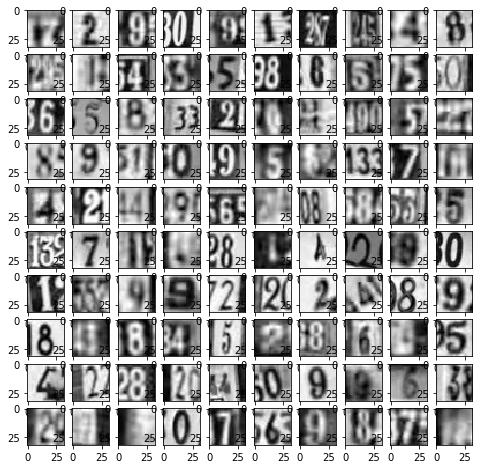

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

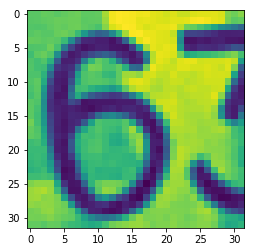

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [0]:
# input image dimensions
img_rows, img_cols = 32, 32

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing the input
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (42000, 32, 32, 1)
42000 train samples
18000 test samples


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',input_shape=(32,32,1)))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation= 'relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [37]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 110us/step - loss: 1.4508 - acc: 0.5156 - val_loss: 0.7218 - val_acc: 0.8083
Epoch 2/20
42000/42000 [==============================] - 4s 99us/step - loss: 0.8037 - acc: 0.7544 - val_loss: 0.5495 - val_acc: 0.8417
Epoch 3/20
42000/42000 [==============================] - 4s 99us/step - loss: 0.6911 - acc: 0.7883 - val_loss: 0.4946 - val_acc: 0.8597
Epoch 4/20
42000/42000 [==============================] - 4s 99us/step - loss: 0.6371 - acc: 0.8026 - val_loss: 0.4689 - val_acc: 0.8643
Epoch 5/20
42000/42000 [==============================] - 4s 99us/step - loss: 0.5912 - acc: 0.8156 - val_loss: 0.4575 - val_acc: 0.8716
Epoch 6/20
42000/42000 [==============================] - 4s 99us/step - loss: 0.5670 - acc: 0.8222 - val_loss: 0.4872 - val_acc: 0.8651
Epoch 7/20
42000/42000 [==============================] - 4s 99us/step - loss: 0.5395 - acc: 0.8300 - val_loss: 0.4328 - val_ac

In [38]:
#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 1s 58us/step
Test loss: 0.3507366358174218
Test accuracy: 0.9


In [39]:
from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 20
BS = 32

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2,
	width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2,
	horizontal_flip=True, vertical_flip=True, fill_mode="nearest")
 
# train the network
model.fit_generator(aug.flow(X_train, y_train, batch_size=BS),
	validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // BS,
	epochs=EPOCHS)

Epoch 1/20
1312/1312 [==============================] - 16s 13ms/step - loss: 2.3089 - acc: 0.0977 - val_loss: 0.3960 - val_acc: 0.8845
Epoch 2/20
1312/1312 [==============================] - 16s 12ms/step - loss: 2.3039 - acc: 0.0992 - val_loss: 0.3977 - val_acc: 0.8835
Epoch 3/20
1312/1312 [==============================] - 16s 12ms/step - loss: 2.3033 - acc: 0.0984 - val_loss: 0.3995 - val_acc: 0.8831
Epoch 4/20
1312/1312 [==============================] - 16s 12ms/step - loss: 2.3031 - acc: 0.1003 - val_loss: 0.3996 - val_acc: 0.8830
Epoch 5/20
1312/1312 [==============================] - 16s 12ms/step - loss: 2.3029 - acc: 0.0995 - val_loss: 0.3996 - val_acc: 0.8829
Epoch 6/20
1312/1312 [==============================] - 16s 12ms/step - loss: 2.3029 - acc: 0.0974 - val_loss: 0.4003 - val_acc: 0.8825
Epoch 7/20
1312/1312 [==============================] - 16s 12ms/step - loss: 2.3028 - acc: 0.1003 - val_loss: 0.4012 - val_acc: 0.8824
Epoch 8/20
1312/1312 [==========================

In [40]:
#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 1s 58us/step
Test loss: 0.4010805518097348
Test accuracy: 0.8825


In [41]:
#Testing the model on test set
score = model.evaluate(X_train, y_train)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

42000/42000 [==============================] - 2s 58us/step
Test loss: 0.2543077072728248
Test accuracy: 0.9278809523809524


I staeted with neural network to build the model. Few observations
1. Data-Augmentation is not producing any great results. I tried tuning the hyper parameters however no result.
2. Though I used One hot encoding to have 9 classes for the Y set. However the train set is having multiple digits and test set is having only one digit. How is it working!!




```
K Nearest Neighbour
```



In [0]:
h5f = h5py.File('/content/drive/My Drive/DL Project/CNN Project-2/SVHN_single_grey1.h5', 'r')

In [4]:
# Load the training, test and validation set
X_train1 = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test1 = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

# Close this file
h5f.close()

print('Training set', X_train1.shape, y_train1.shape)
print('Test set', X_test1.shape, y_test1.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


In [0]:
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [0]:
# Reshape the input set from 2D to 1D
X_train1 = X_train1.reshape((42000,32*32))
X_test1 = X_test1.reshape((18000,32*32))

Optimum K =  sqrt(N)/2 where N is the number of samples.
In this example we have 42000 samples, hence taking the K val as 103

Higher K value is computationally expensive and in my machine it didnt work. Took hours to get the model fitted with K val as 103. Hence trying another mean

In [0]:
kVals = range(1, 30, 2)
accuracies = []
 
for k in range(1, 30, 2):
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train1, y_train1)
 
	score = model.score(X_test1, y_test1)
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))  

I am unable to run the above code. its taking hours to finish!!

In [7]:
model = KNeighborsClassifier(n_neighbors=18)
model.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(X_test1)

In [10]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.70      0.54      1814
           1       0.46      0.73      0.56      1828
           2       0.62      0.55      0.59      1803
           3       0.45      0.42      0.44      1719
           4       0.66      0.64      0.65      1812
           5       0.51      0.39      0.44      1768
           6       0.50      0.41      0.45      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.36      0.41      1812
           9       0.56      0.43      0.48      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.52     18000
weighted avg       0.54      0.53      0.52     18000



KNN:
1. took hours to run
2. Accuracy is very low; at 53%. Though i couldn't try tuning the hyper parameter due to high run time

Neural Netwrok:
1. Very fast to execute
2. High accuracy at 92%